In [1]:
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy.fftpack import fft

In [74]:
def get_video_max_frame_over_time(vid_path):
    """
    Returns the maximum frame value over time for a given video.
    max_frame = max(max_frame_1, max_frame_2, ..., max_frame_n)
    """

    cap = cv.VideoCapture(vid_path)
    ret, frame = cap.read()
    max_frame = np.copy(frame)
    while ret:
        max_frame = np.maximum(max_frame, frame)
        ret, frame = cap.read()

    return max_frame

def plot_im_hist_side_by_side(im, title='Max frame over time'):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].imshow(im)
    ax[0].set_title(title)
    ax[0].set_axis_off()
    ax[1].hist(im.ravel(), 256, [0, 256])
    ax[1].set_title('Histogram')
    ax[1].set_xlabel('Pixel Value')
    ax[1].set_ylabel('Frequency')
    # y axis log scale for histogram
    ax[1].set_yscale('log')
    plt.show()

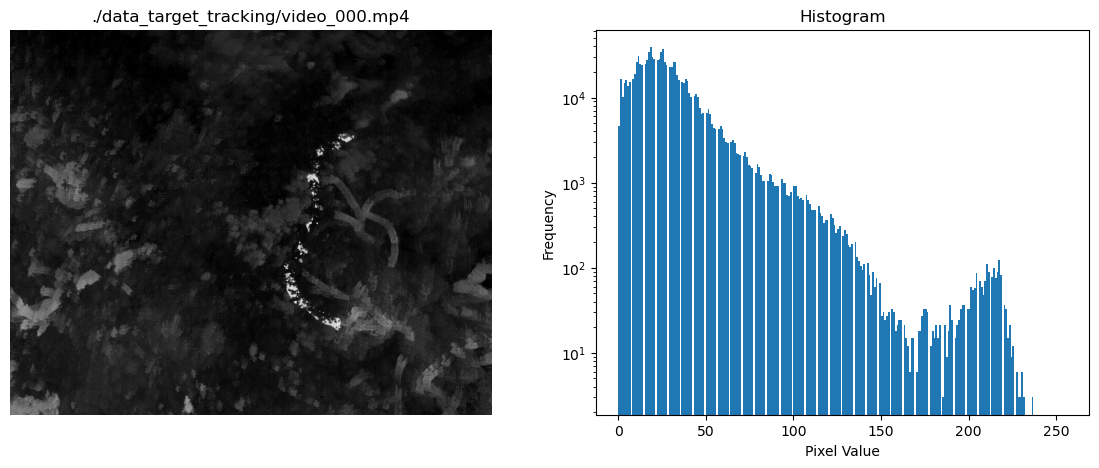

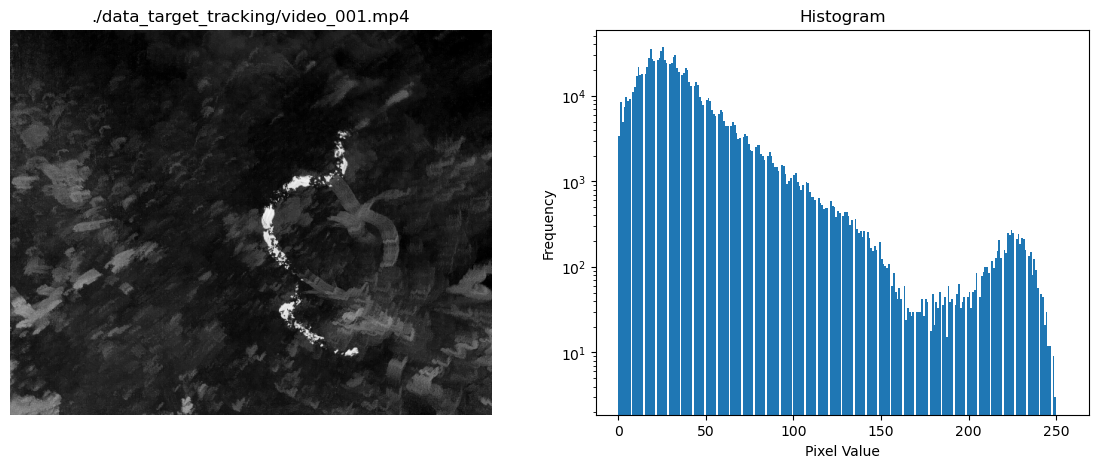

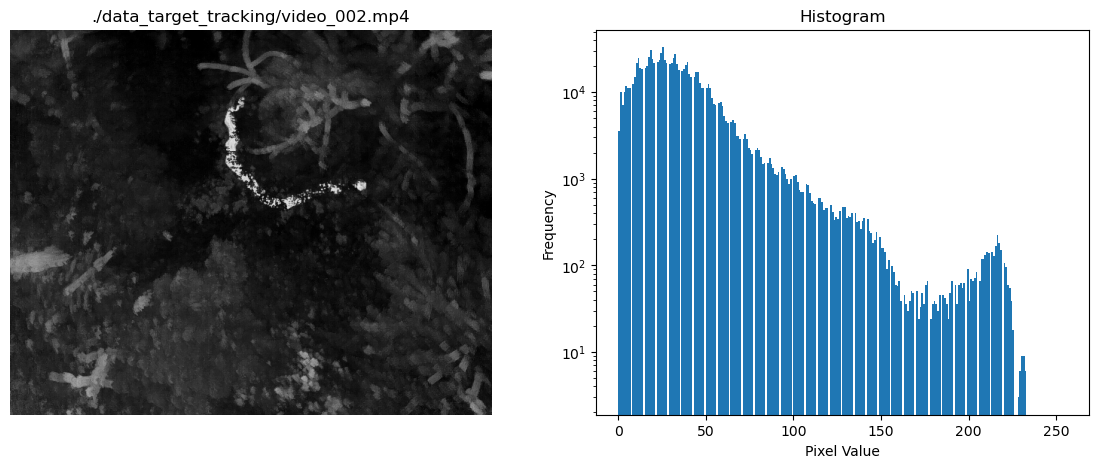

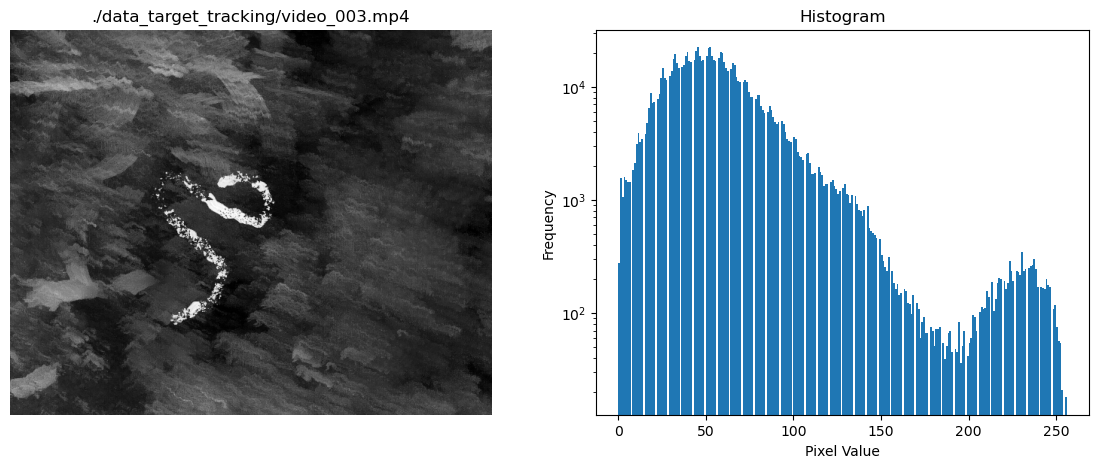

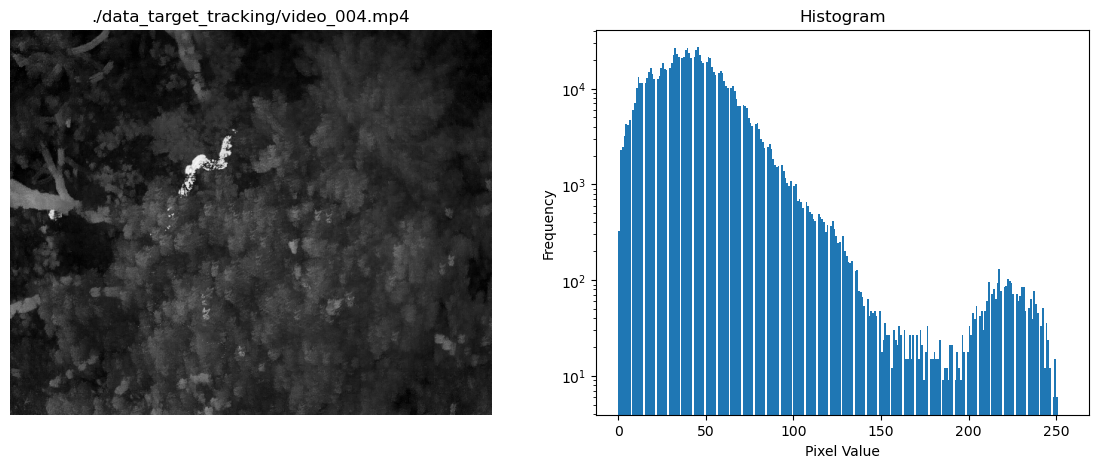

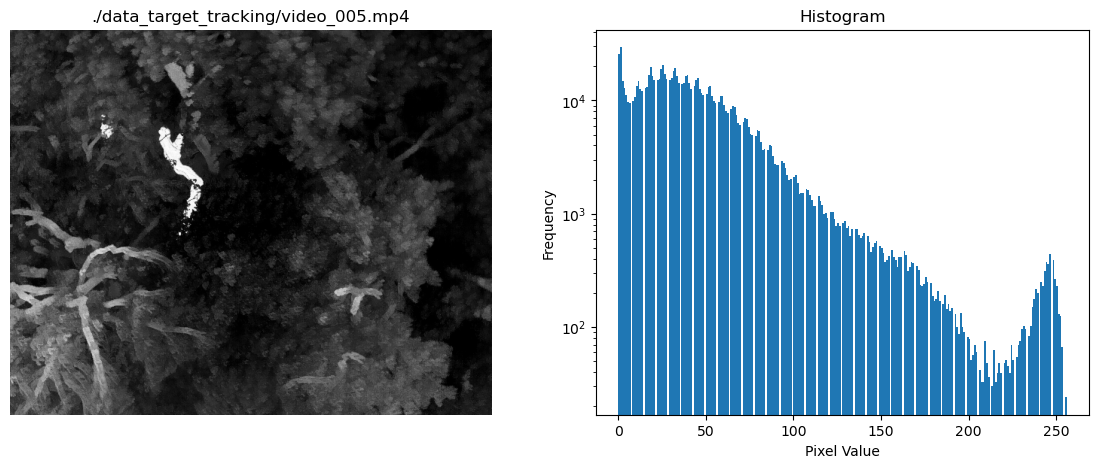

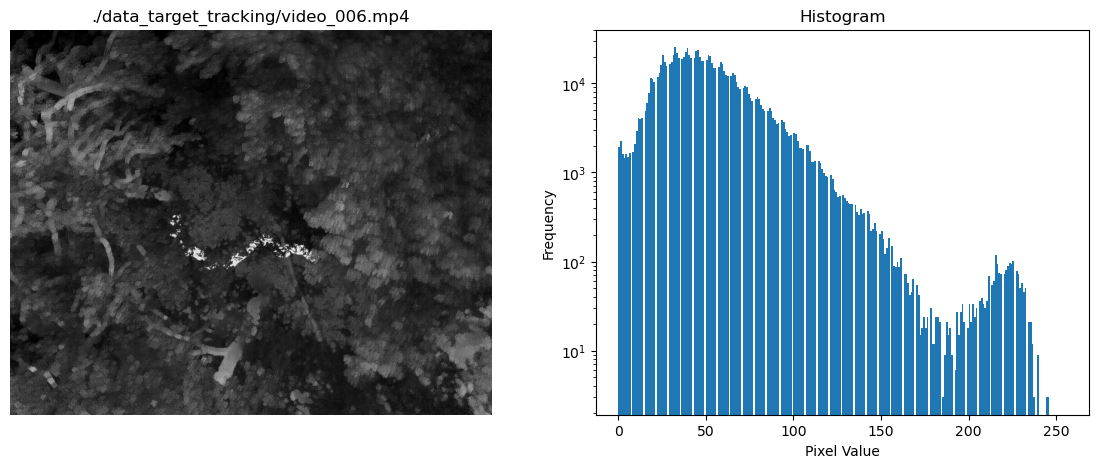

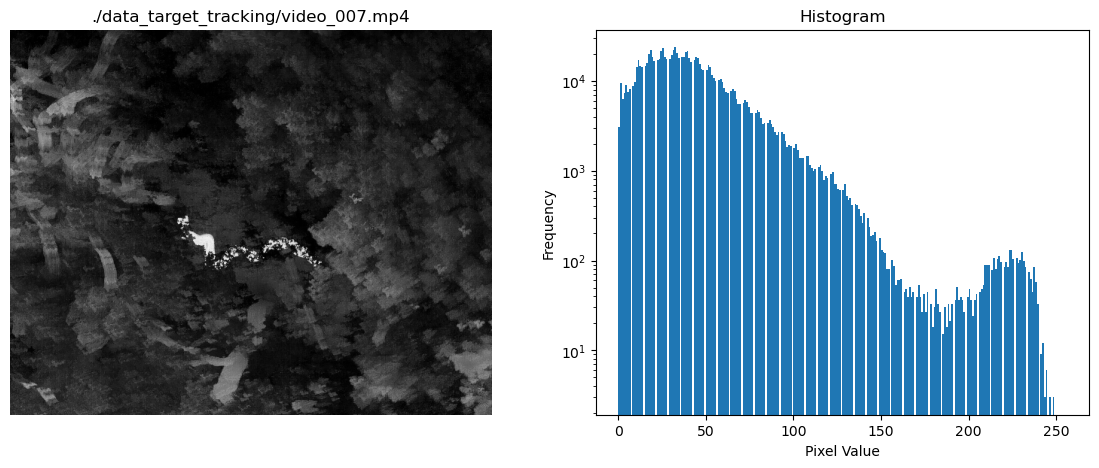

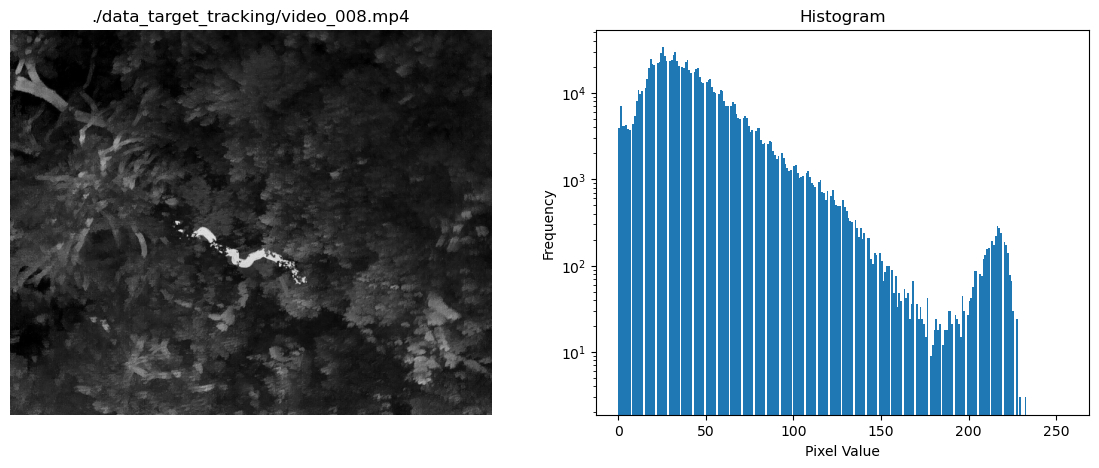

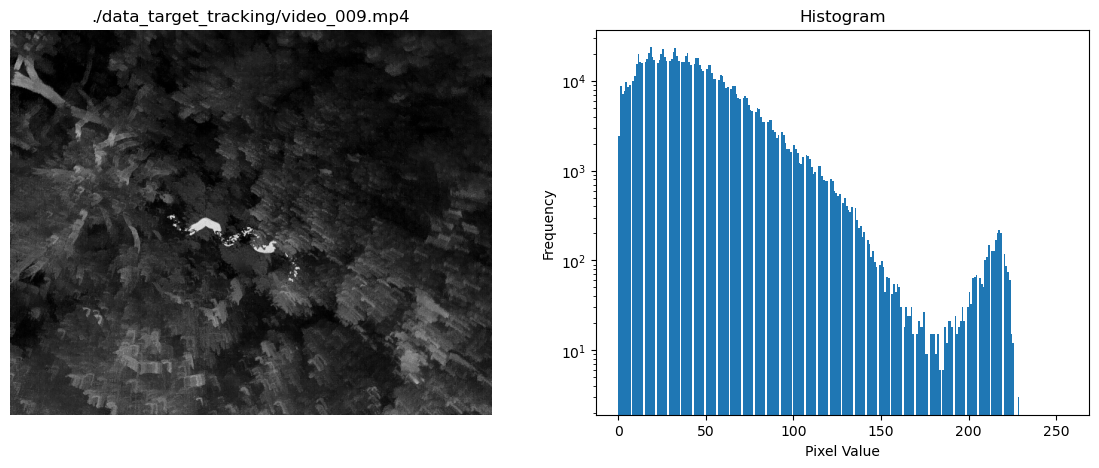

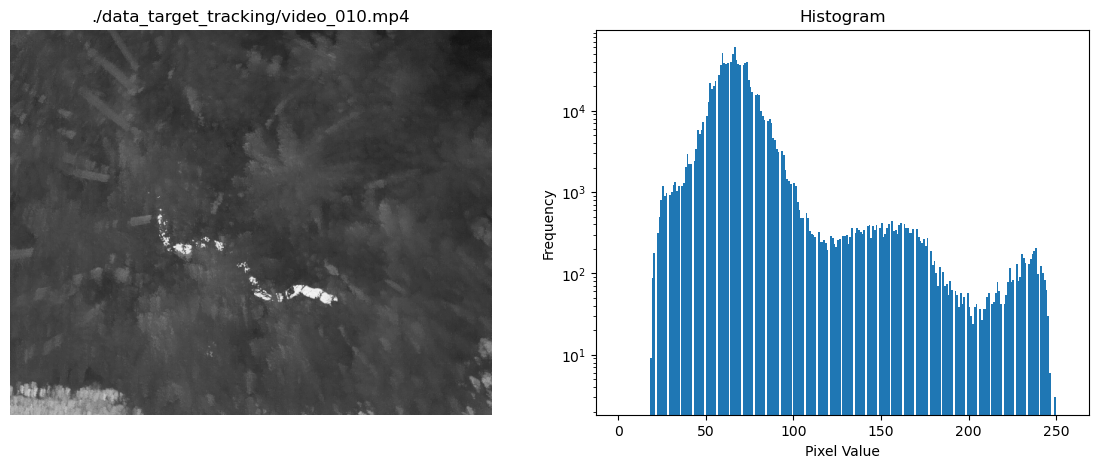

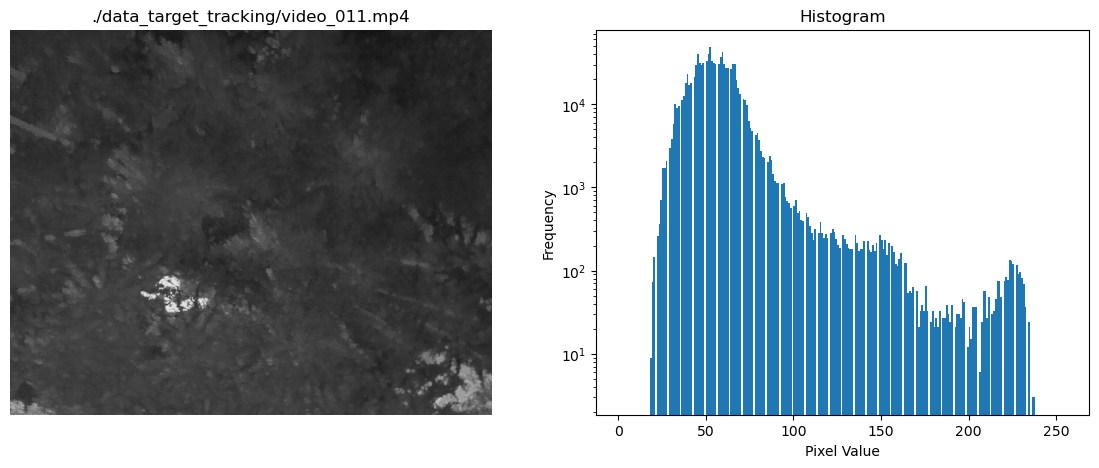

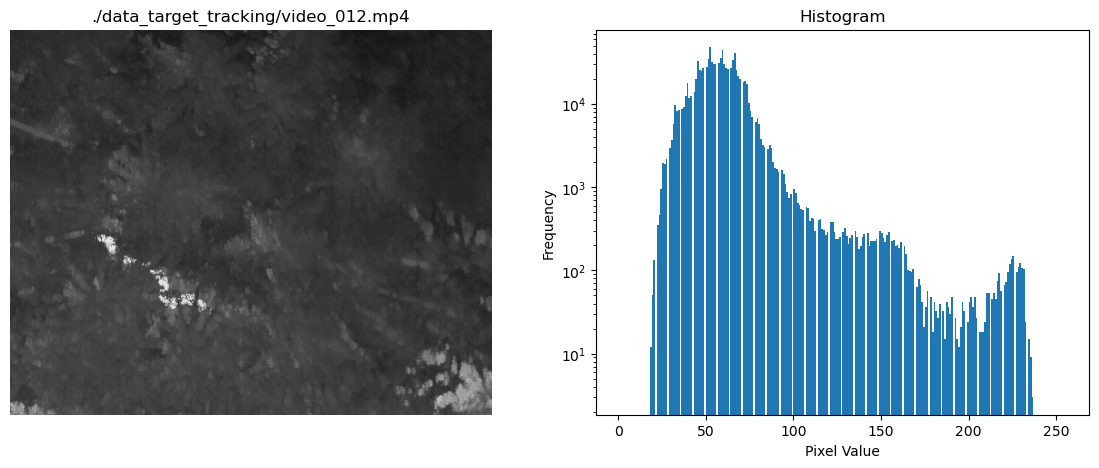

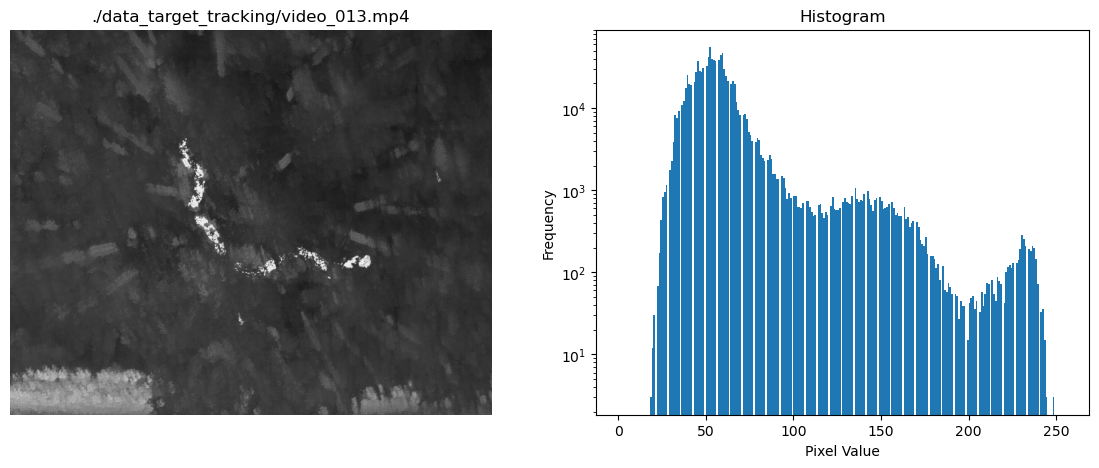

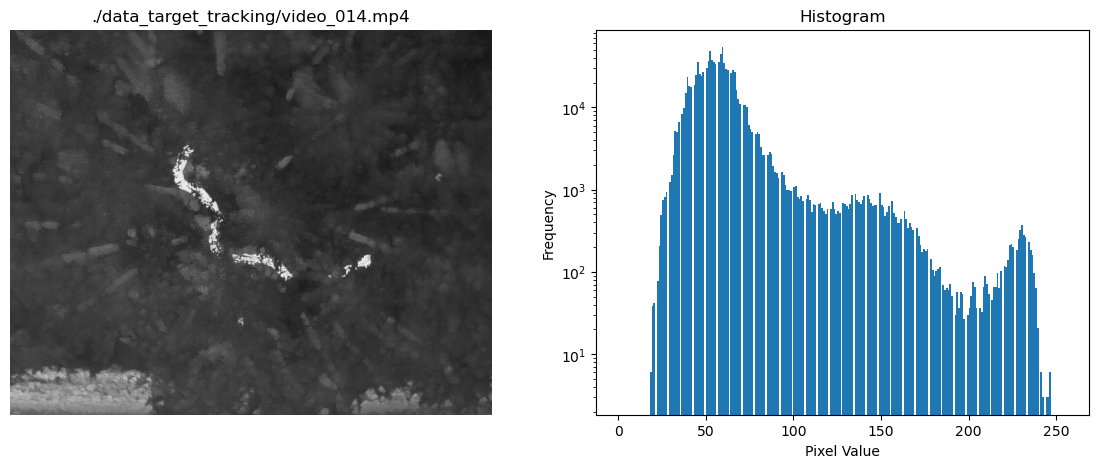

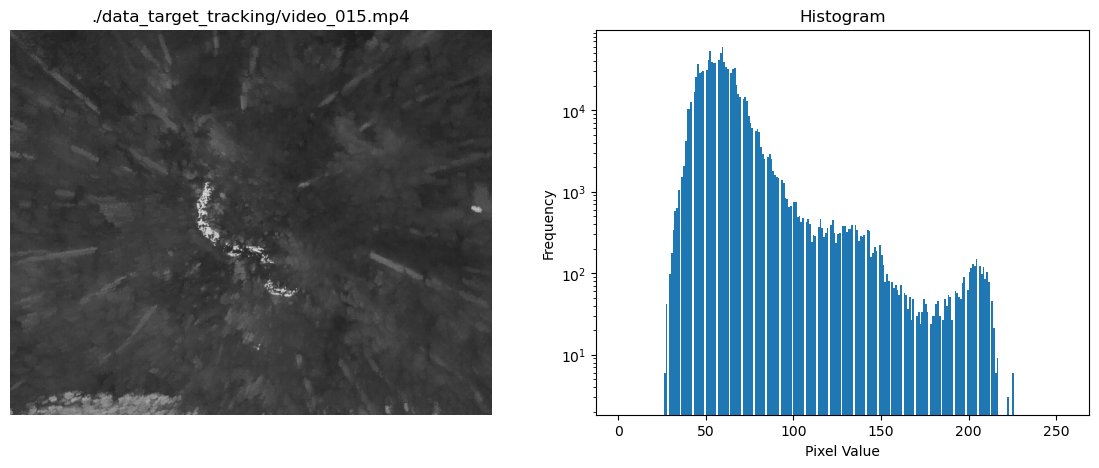

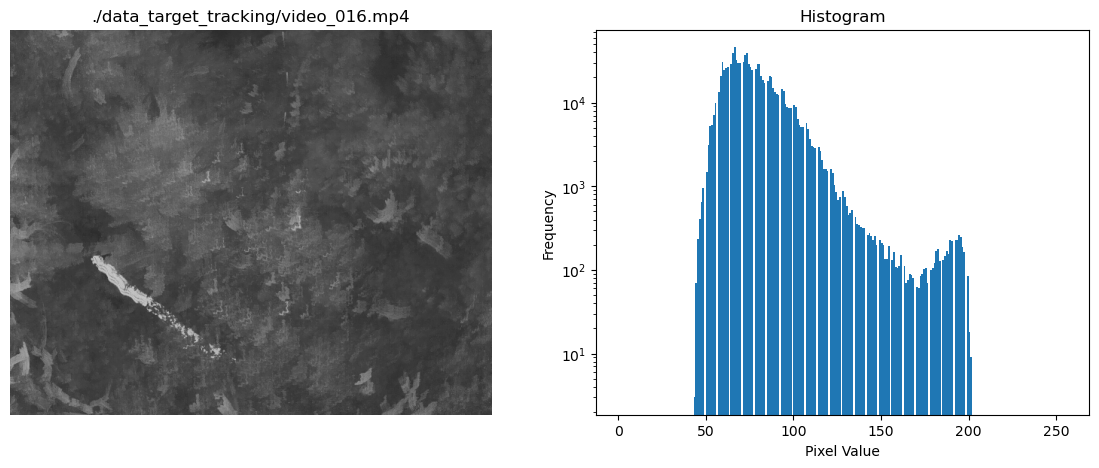

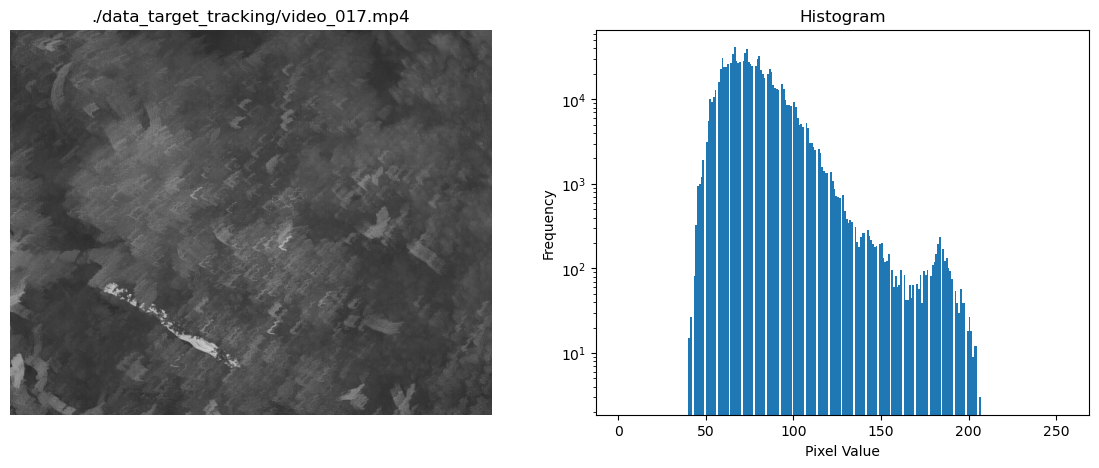

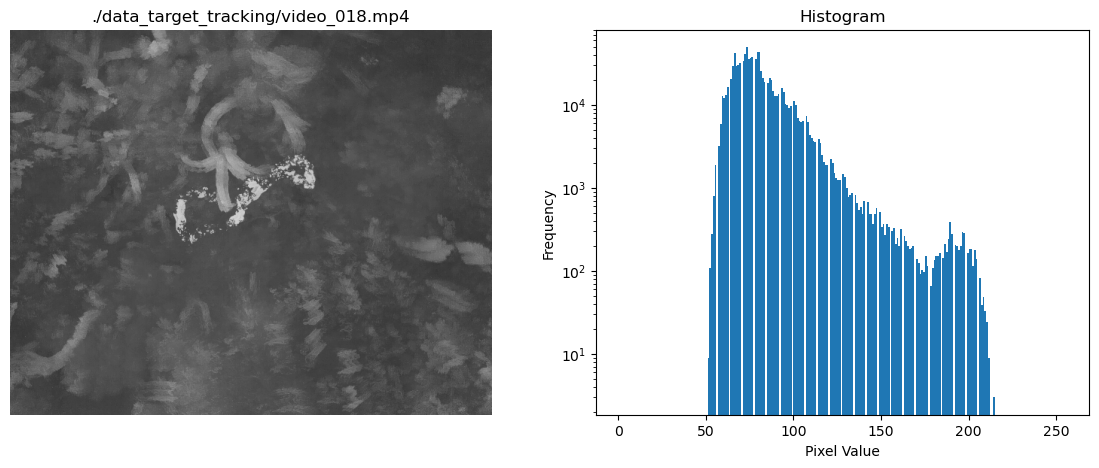

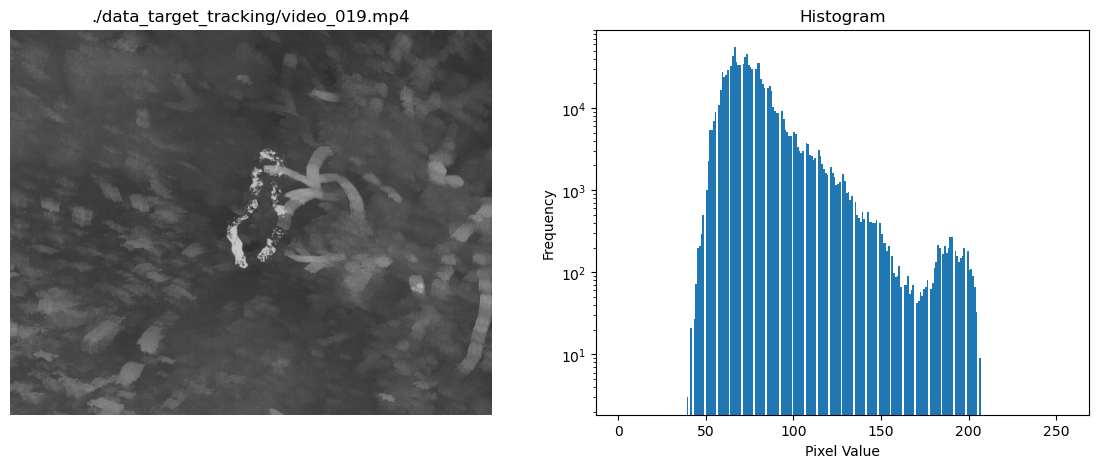

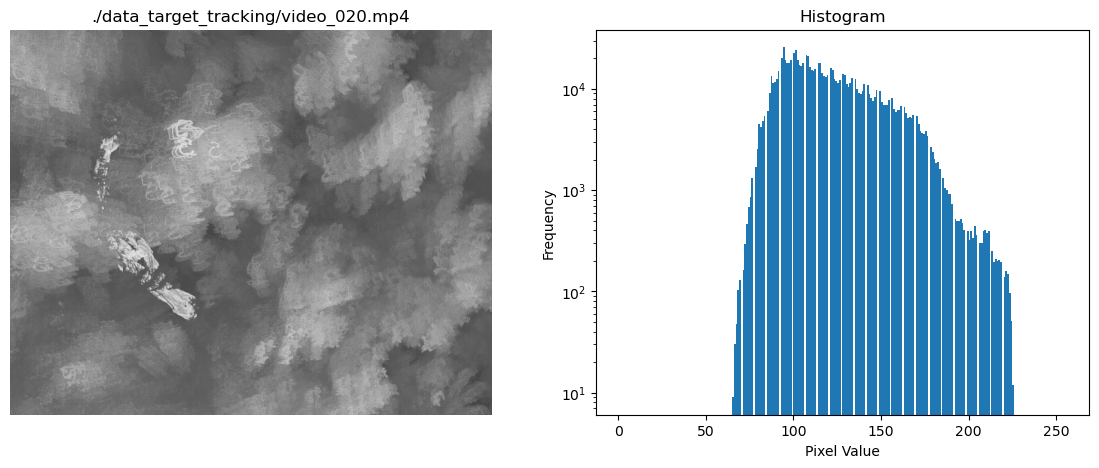

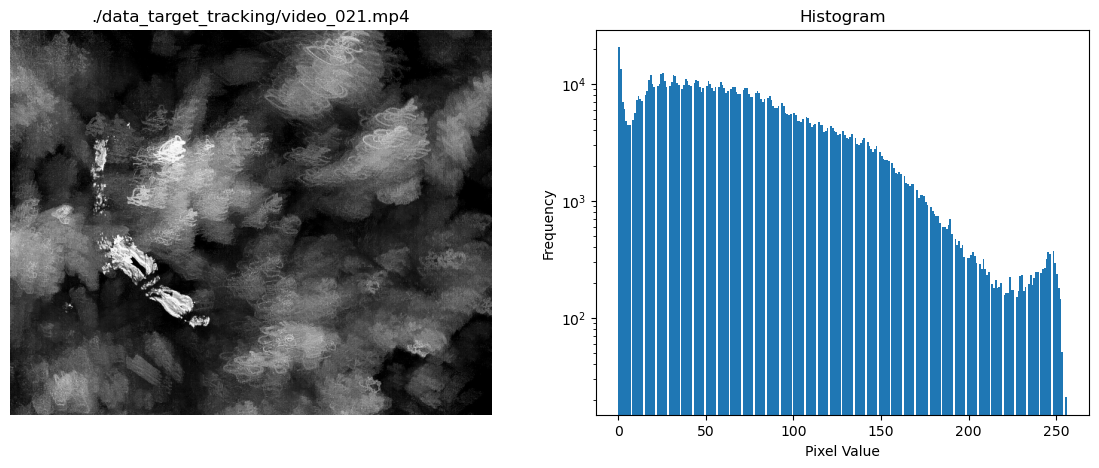

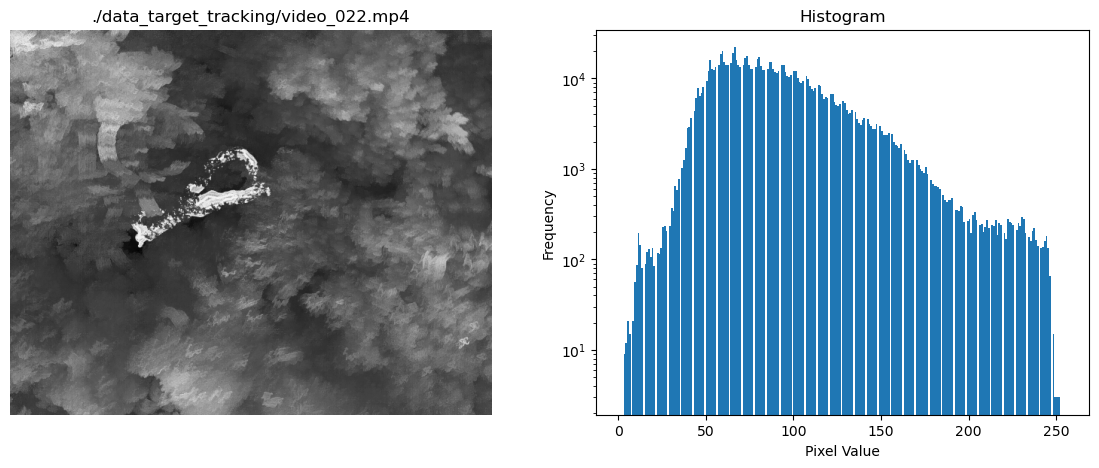

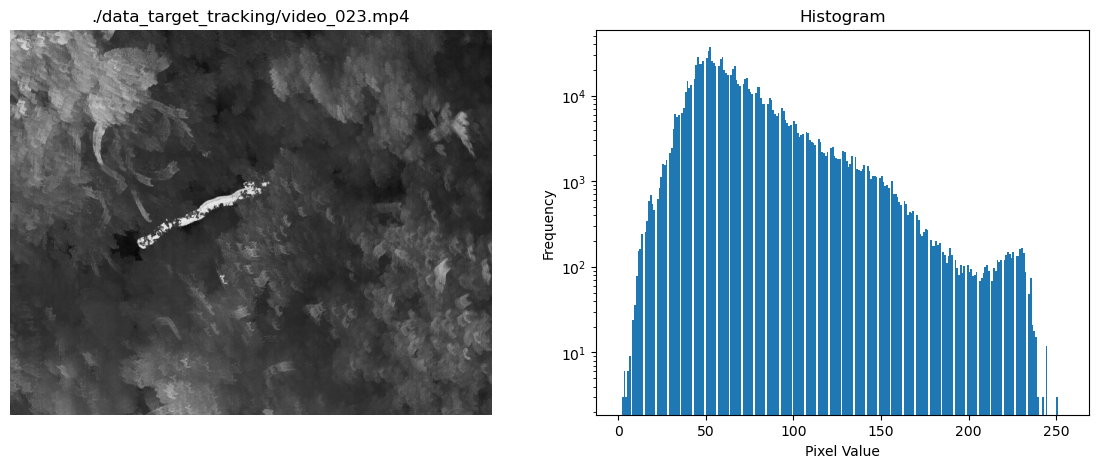

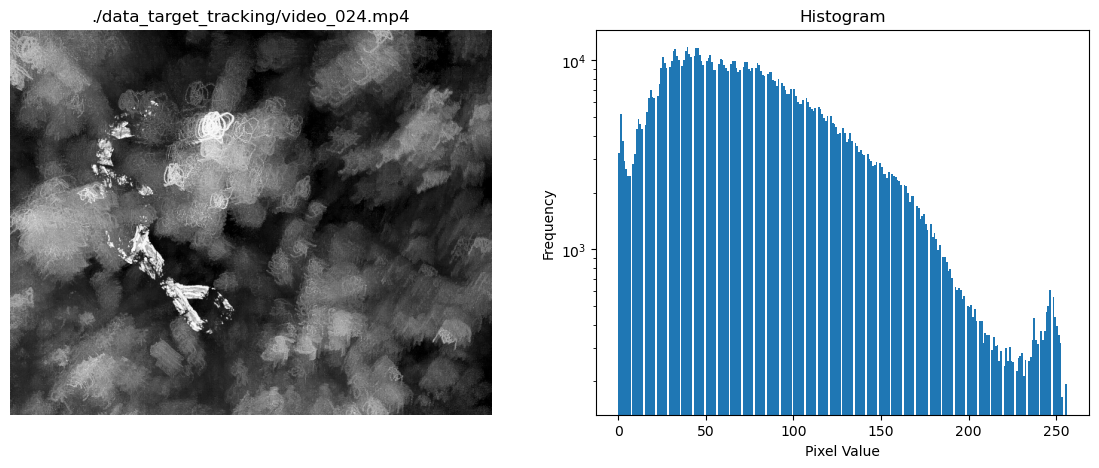

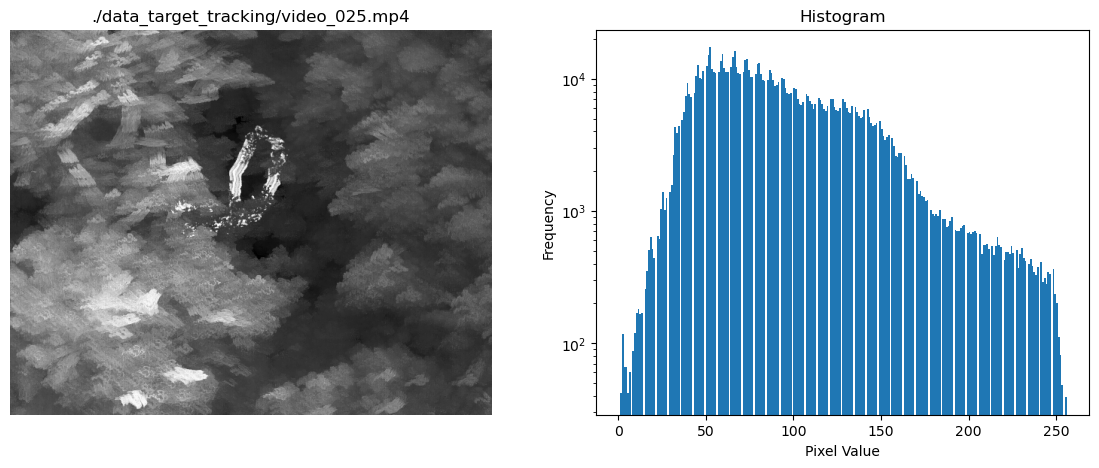

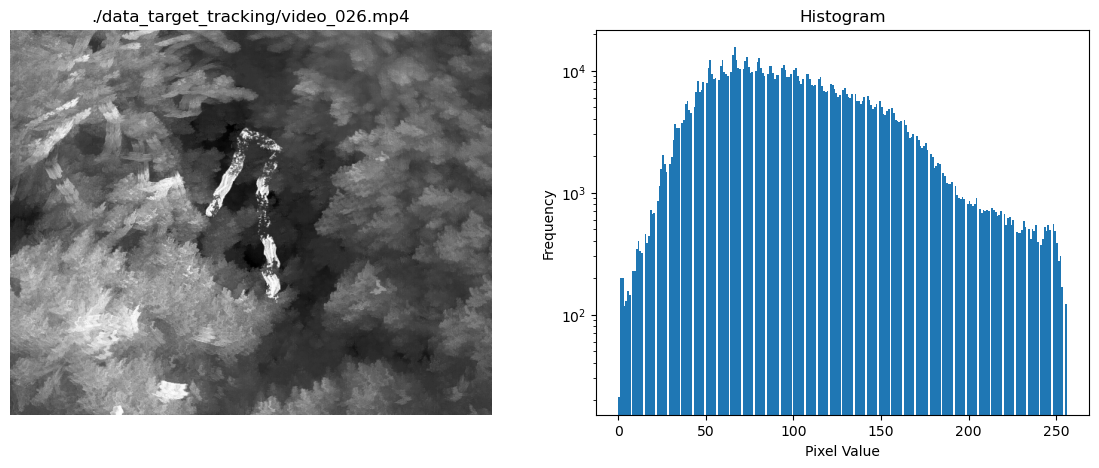

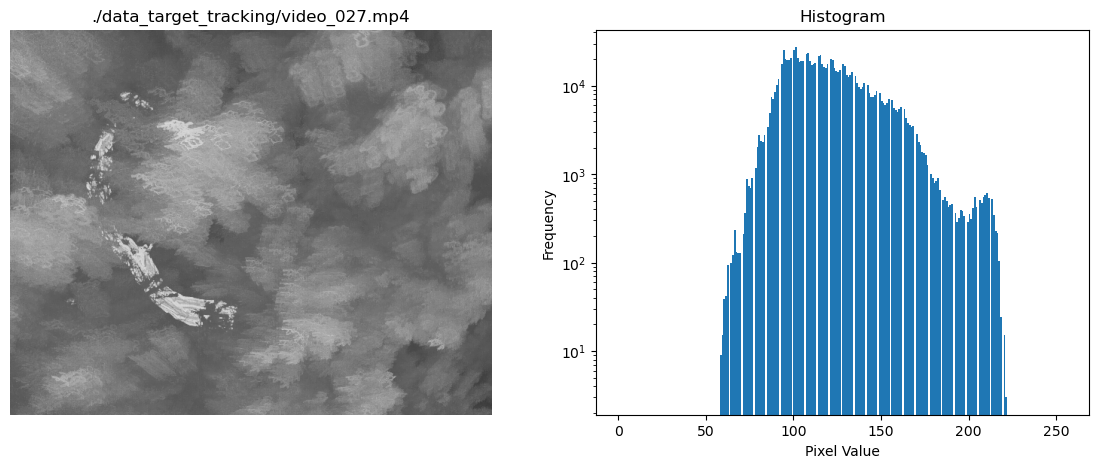

In [80]:
videos = glob.glob("./data_target_tracking/*.mp4")
videos = sorted(videos)
for vid_path in videos:
    max_frame = get_video_max_frame_over_time(vid_path)
    plot_im_hist_side_by_side(max_frame, title=vid_path)